#### 1) Delivery_time -> Predict delivery time using sorting time 
#### 2) Salary_hike -> Build a prediction model for Salary_hike

#### ------------------------------------------------------------

#### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

from sklearn.preprocessing import FunctionTransformer

from sklearn.linear_model import LinearRegression

## Question 1: Delivery Time Precdiction

## Reading the data

In [67]:
delivery = pd.read_csv('delivery_time.csv')

In [68]:
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [69]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [70]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [71]:
delivery.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [72]:
delivery.size

42

In [73]:
delivery.shape

(21, 2)

## Performing EDA

In [74]:
delivery.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

##### No missing value is there

In [75]:
delivery.duplicated().any()

False

##### No duplicate value is there

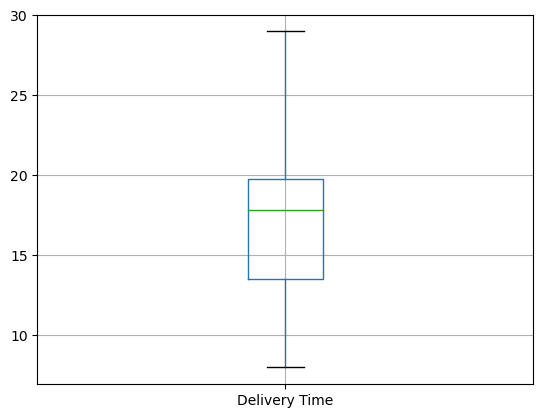

In [76]:
delivery.boxplot(column='Delivery Time')
plt.show()

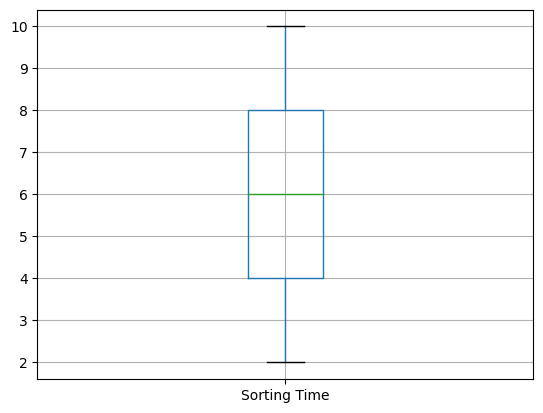

In [77]:
delivery.boxplot(column='Sorting Time')
plt.show()

##### No outliers are present

## Checking if the data is normally distributed

C:\Users\Simran Kaur\AppData\Local\Temp\ipykernel_13324\4030013951.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delivery['Delivery Time'])


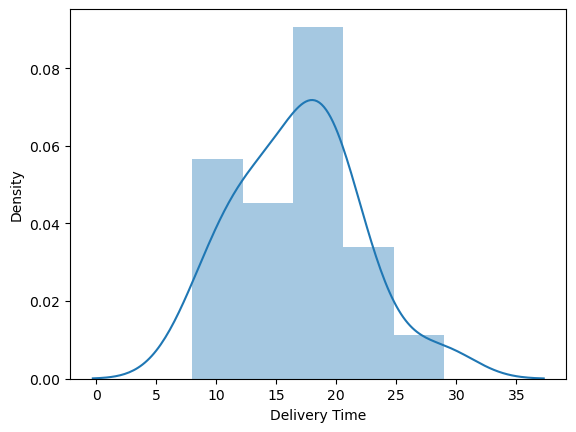

In [78]:
sns.distplot(delivery['Delivery Time'])
plt.show()

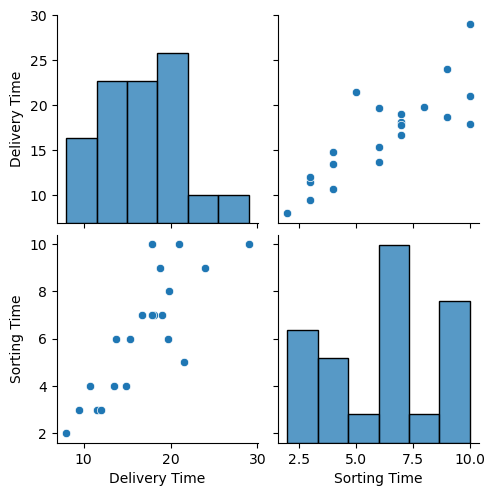

In [79]:
sns.pairplot(delivery)
plt.show();

## Correlation Matrix

In [100]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


## HeatMap

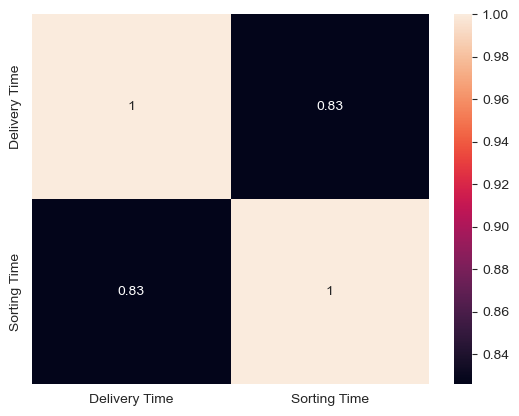

In [111]:
sns.heatmap(delivery.corr(), annot=True)
plt.show()

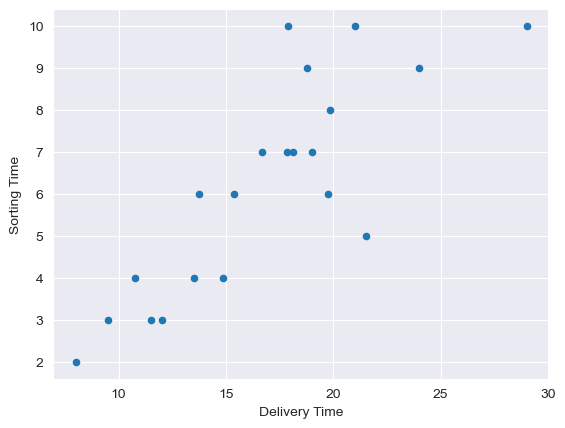

In [115]:
delivery.plot(kind='scatter', x='Delivery Time', y='Sorting Time')
plt.show()

## Performing Linear Regression

In [80]:
target = pd.DataFrame(delivery['Delivery Time'])

In [81]:
target.head()

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00


In [82]:
feature = pd.DataFrame(delivery['Sorting Time'])

In [83]:
feature.head()

,Sorting Time
0,10
1,4
2,6
3,9
4,10


In [84]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, train_size=.75, random_state=100)

In [85]:
x_train

,Sorting Time
0,10
1,4
9,9
17,7
12,7
5,6
2,6
4,10
14,3
10,8


In [86]:
(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

((15, 1), (6, 1), (15, 1), (6, 1))

C:\Users\Simran Kaur\AppData\Local\Temp\ipykernel_13324\3518932891.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Sorting Time'])


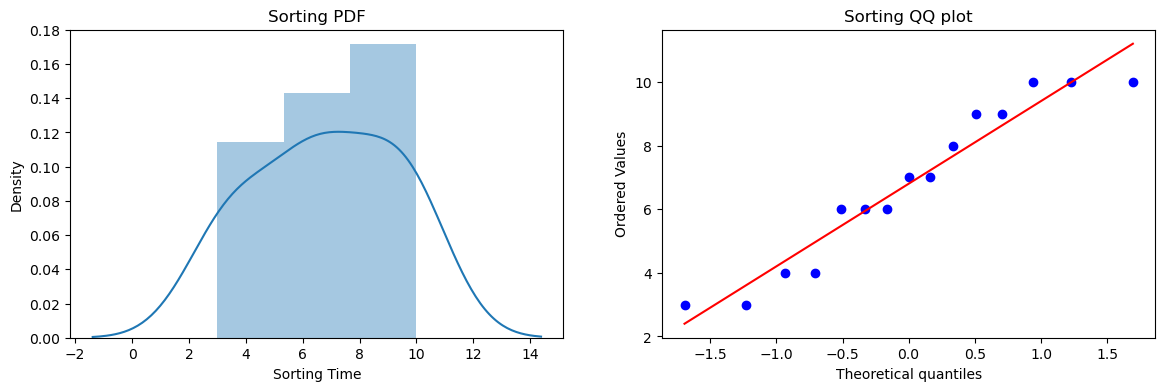

In [87]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Sorting Time'])
plt.title('Sorting PDF')

plt.subplot(122)
stats.probplot(x_train['Sorting Time'], dist='norm', plot=plt)
plt.title('Sorting QQ plot')

plt.show()

In [88]:
model = LinearRegression()

In [89]:
model.fit(x_train, y_train)

LinearRegression()

In [90]:
y_pred = model.predict(x_test)

In [91]:
y_pred

array([[ 9.90647059],
       [14.71617647],
       [13.11294118],
       [17.92264706],
       [11.50970588],
       [17.92264706]])

In [92]:
model.score(x_test, y_test)

0.6116113859323284

In [93]:
model.intercept_

array([6.7])

In [94]:
model.coef_

array([[1.60323529]])

In [95]:
r2_score(y_test, y_pred)

0.6116113859323284

# Transformation

### Log Transform

[[ 7.48404661]
 [15.27365512]
 [13.22472008]
 [18.50663476]
 [10.71702625]
 [18.50663476]]
r2 score for Log Transform is:  0.6800220126988701


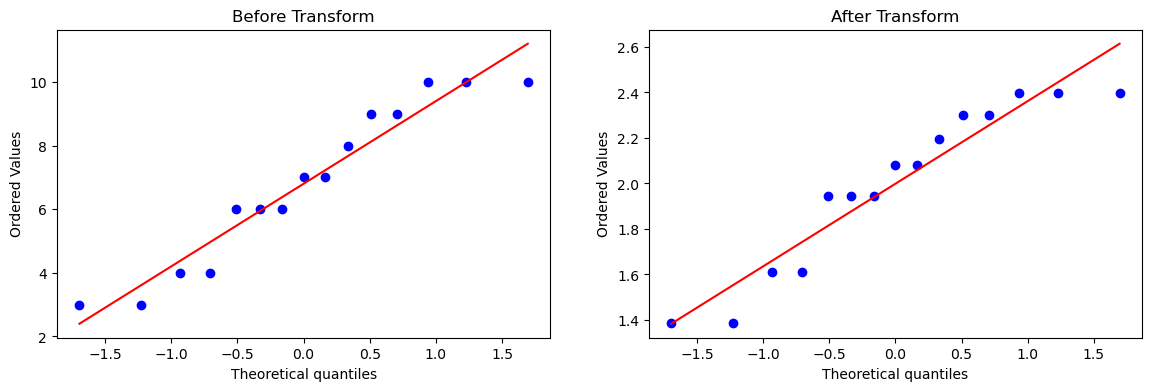

In [96]:
logtr = FunctionTransformer(np.log1p)

x_train_transform = logtr.fit_transform(x_train)
x_test_transform = logtr.fit_transform(x_test)

model.fit(x_train_transform, y_train)

y_pred_log = model.predict(x_test_transform)

print(y_pred_log)
print("r2 score for Log Transform is: ", r2_score(y_test, y_pred_log))

plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Sorting Time'], dist='norm', plot=plt)
plt.title('Before Transform')

plt.subplot(122)
stats.probplot(x_train_transform['Sorting Time'], dist='norm', plot=plt)
plt.title('After Transform')

plt.show()

### Square Transform

[[11.91543199]
 [14.39641388]
 [13.33313592]
 [17.23182175]
 [12.50614196]
 [17.23182175]]
r2 score for Square Transform is:  0.4700963871134177


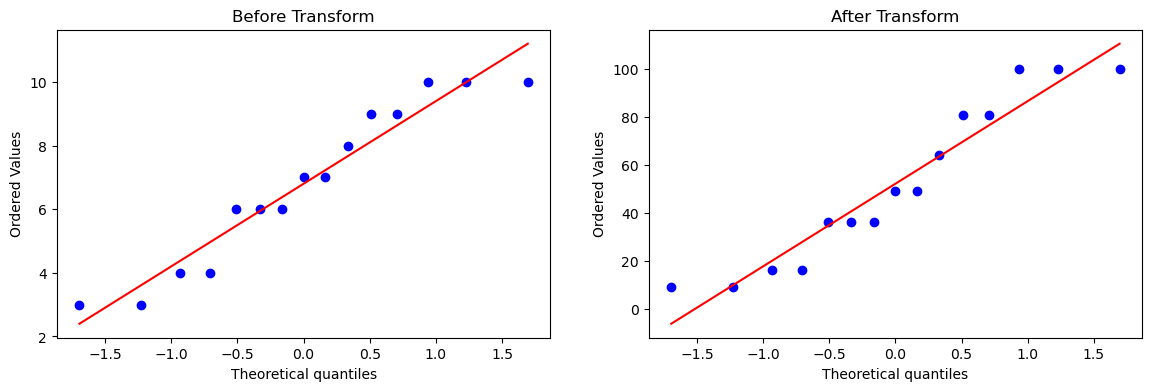

In [97]:
sqr = FunctionTransformer(lambda feature: feature**2)

x_train_transform = sqr.fit_transform(x_train)
x_test_transform = sqr.fit_transform(x_test)

model.fit(x_train_transform, y_train)

y_pred_log = model.predict(x_test_transform)

print(y_pred_log)
print("r2 score for Square Transform is: ", r2_score(y_test, y_pred_log))

plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Sorting Time'], dist='norm', plot=plt)
plt.title('Before Transform')

plt.subplot(122)
stats.probplot(x_train_transform['Sorting Time'], dist='norm', plot=plt)
plt.title('After Transform')

plt.show()

### Cube Transform

[[ 63488.20394659]
 [ 54577.87182701]
 [135920.2890654 ]
 [ 55950.38636041]
 [ 67824.2294521 ]
 [ 68639.29665139]
 [108007.4798012 ]
 [ 76193.0763859 ]]
r2 score for Cube Transform is:  0.44167901053008285


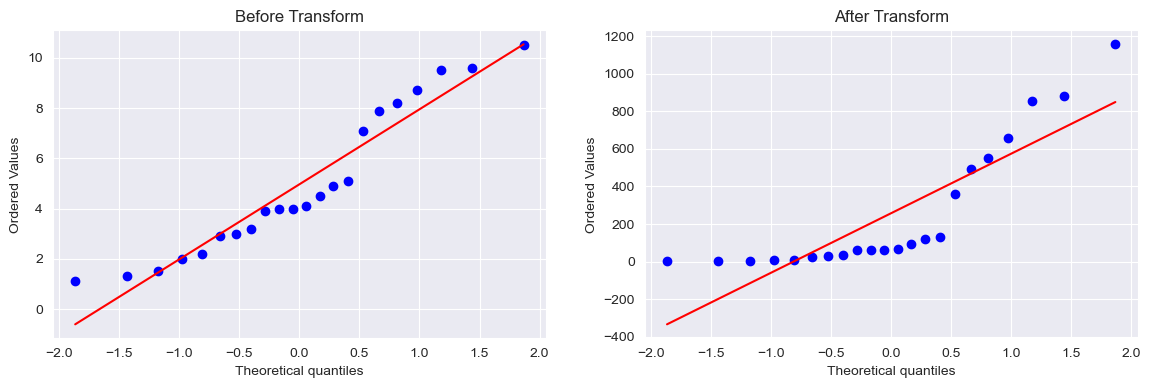

In [129]:
cube = FunctionTransformer(lambda feature_salary: feature_salary**3)

x_train_st = cube.fit_transform(x_train_salary)
x_test_st = cube.fit_transform(x_test_salary)

model.fit(x_train_st, y_train_salary)

y_pred_log = model.predict(x_test_st)

print(y_pred_log)
print("r2 score for Cube Transform is: ", r2_score(y_test_salary, y_pred_log))


plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train_salary['YearsExperience'], dist='norm', plot=plt)
plt.title('Before Transform')

plt.subplot(122)
stats.probplot(x_train_st['YearsExperience'], dist='norm', plot=plt)
plt.title('After Transform')

plt.show()

### Square-root Transform

[[ 8.49629747]
 [15.02033434]
 [13.14638178]
 [18.27247867]
 [11.01935006]
 [18.27247867]]
r2 score for Square-root Transform is:  0.6630907799376671


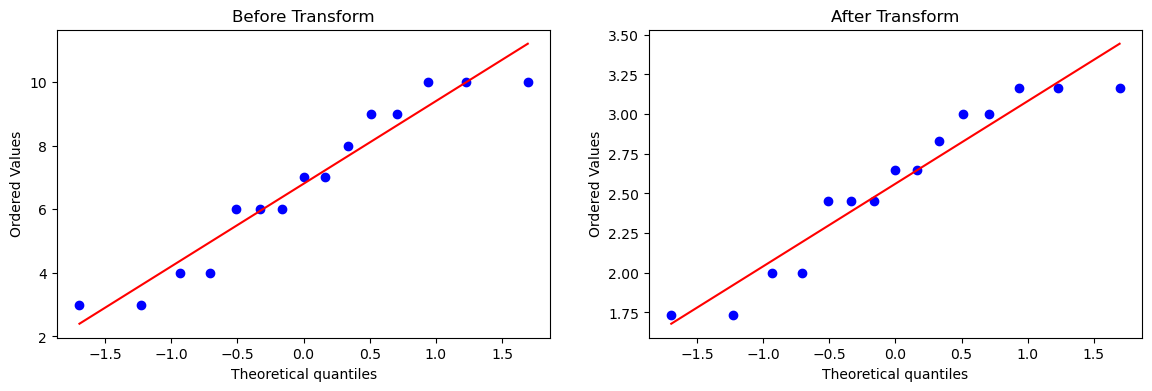

In [98]:
sqrt = FunctionTransformer(lambda feature: feature**0.5)

x_train_transform = sqrt.fit_transform(x_train)
x_test_transform = sqrt.fit_transform(x_test)

model.fit(x_train_transform, y_train)

y_pred_log = model.predict(x_test_transform)

print(y_pred_log)
print("r2 score for Square-root Transform is: ", r2_score(y_test, y_pred_log))

plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Sorting Time'], dist='norm', plot=plt)
plt.title('Before Transform')

plt.subplot(122)
stats.probplot(x_train_transform['Sorting Time'], dist='norm', plot=plt)
plt.title('After Transform')

plt.show()

### Reciprocal Transform

[[ 1.99063674]
 [16.32644202]
 [13.93714114]
 [19.05707159]
 [ 9.954973  ]
 [19.05707159]]
r2 score for Reciprocal Transform is:  0.4702935839403497


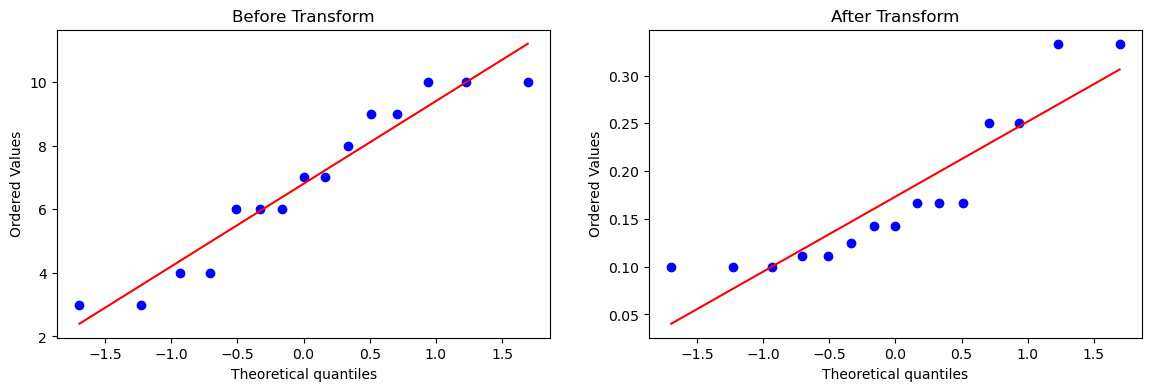

In [99]:
reci = FunctionTransformer(lambda feature: 1/(feature))

x_train_transform = reci.fit_transform(x_train)
x_test_transform = reci.fit_transform(x_test)

model.fit(x_train_transform, y_train)

y_pred_log = model.predict(x_test_transform)

print(y_pred_log)
print("r2 score for Reciprocal Transform is: ", r2_score(y_test, y_pred_log))

plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Sorting Time'], dist='norm', plot=plt)
plt.title('Before Transform')

plt.subplot(122)
stats.probplot(x_train_transform['Sorting Time'], dist='norm', plot=plt)
plt.title('After Transform')

plt.show()

### Cube Root Transform

[[ 7.95322524]
 [15.14182156]
 [13.18396832]
 [18.38356667]
 [10.86550581]
 [18.38356667]]
r2 score for Cube Root Transform is:  0.6733451105589232


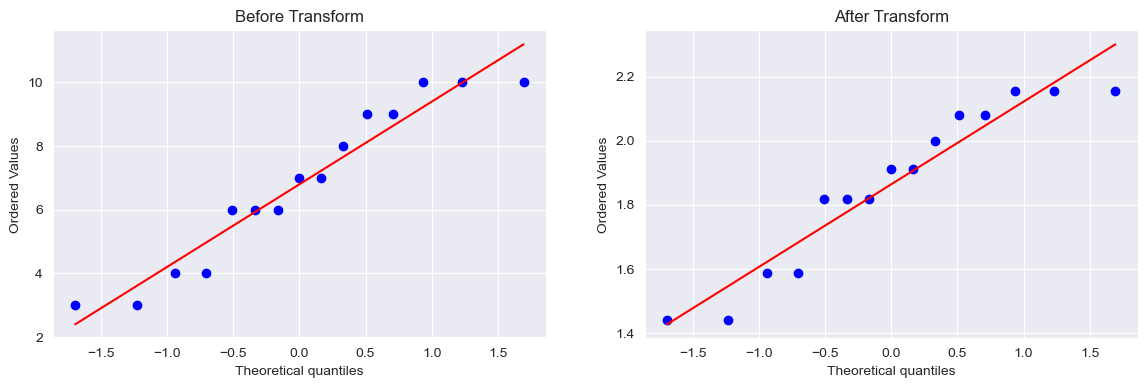

In [128]:
cbrt = FunctionTransformer(lambda feature: feature**(1/3))

x_train_transform = cbrt.fit_transform(x_train)
x_test_transform = cbrt.fit_transform(x_test)

model.fit(x_train_transform, y_train)

y_pred_log = model.predict(x_test_transform)

print(y_pred_log)
print("r2 score for Cube Root Transform is: ", r2_score(y_test, y_pred_log))

plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Sorting Time'], dist='norm', plot=plt)
plt.title('Before Transform')

plt.subplot(122)
stats.probplot(x_train_transform['Sorting Time'], dist='norm', plot=plt)
plt.title('After Transform')

plt.show()

### So, log transformed model is the best model so far with r2 score 0.68

## Question 2: Salary Hike Prediction

### Reading the data

In [34]:
salary = pd.read_csv('Salary_Data.csv')

In [35]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [36]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [37]:
salary.describe(include='all')

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [38]:
salary.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [39]:
salary.size

60

In [40]:
salary.shape

(30, 2)

### Performing EDA

In [41]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

##### No missing value is there

In [42]:
salary.duplicated().any()

False

##### No duplicate value is there

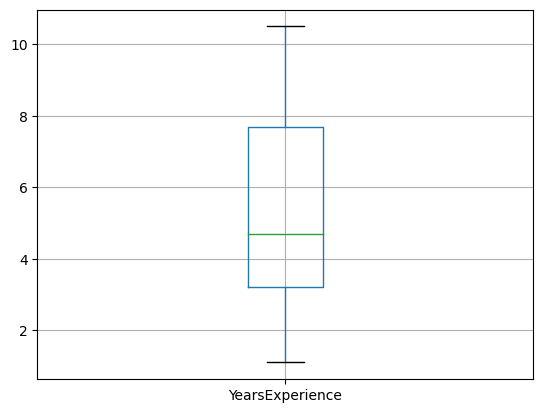

In [43]:
salary.boxplot(column='YearsExperience')
plt.show()

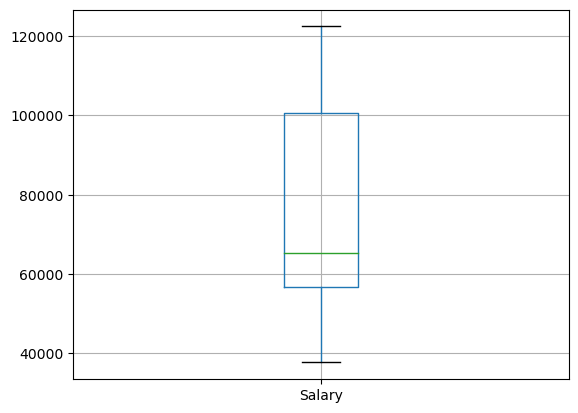

In [44]:
salary.boxplot(column='Salary')
plt.show()

##### So, there are no outliers

## Check for normal distribution

C:\Users\Simran Kaur\AppData\Local\Temp\ipykernel_13324\568650448.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['YearsExperience'])


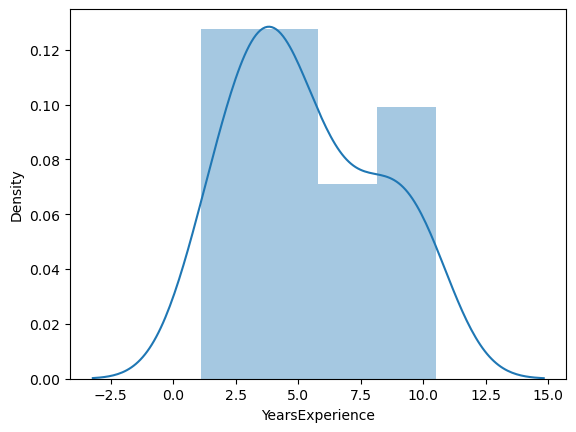

In [45]:
sns.distplot(salary['YearsExperience'])
plt.show()

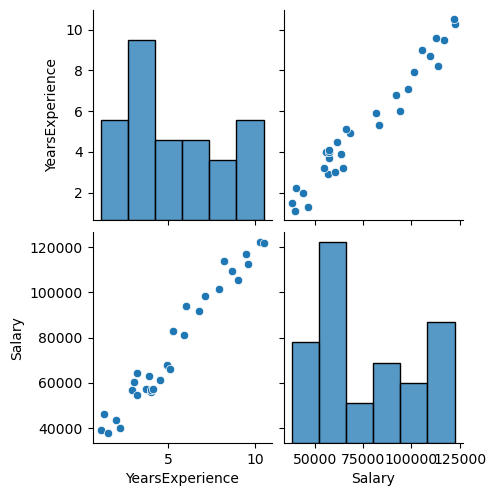

In [46]:
sns.pairplot(salary)
plt.show();

# Correlation Matrix

In [119]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## HeatMap

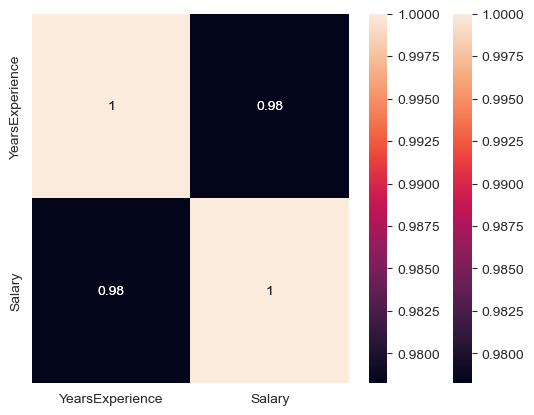

In [121]:
sns.heatmap(salary.corr(), annot=True)
plt.show()

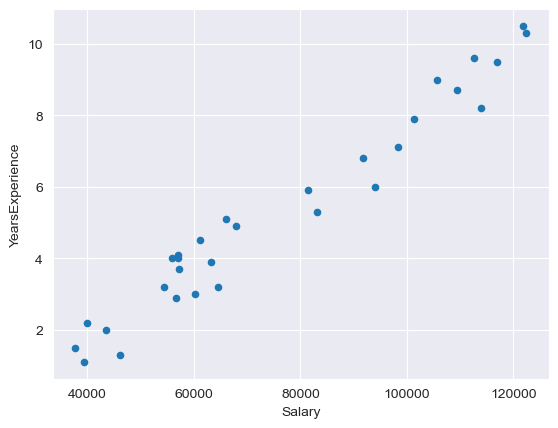

In [122]:
salary.plot(kind='scatter', x='Salary', y='YearsExperience')
plt.show()

## Performing Linear Regression

In [47]:
target_salary = pd.DataFrame(salary['Salary'])

In [48]:
target_salary.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [49]:
feature_salary = pd.DataFrame(salary['YearsExperience'])

In [50]:
feature_salary.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [51]:
x_train_salary, x_test_salary, y_train_salary, y_test_salary = train_test_split(feature_salary, target_salary, train_size=0.75, random_state=50)

In [52]:
x_train_salary

,YearsExperience
29,10.5
21,7.1
10,3.9
27,9.6
12,4.0
3,2.0
14,4.5
24,8.7
15,4.9
7,3.2


In [53]:
model_salary = LinearRegression()

In [54]:
model_salary.fit(x_train_salary, y_train_salary)

LinearRegression()

In [55]:
y_pred_salary = model_salary.predict(x_test_salary)

In [56]:
y_pred_salary

array([[ 75046.60843614],
       [ 54991.21522674],
       [122797.544649  ],
       [ 59766.30884802],
       [ 80776.72078168],
       [ 81731.73950594],
       [110382.30123366],
       [ 89371.8893    ]])

In [57]:
model_salary.score(x_test_salary, y_test_salary)

0.8910792481155526

#### So, we have the best model with score of 0.911

In [58]:
model_salary.intercept_

array([24430.6160505])

In [59]:
model_salary.coef_

array([[9550.18724257]])

In [60]:
r2_score(y_test_salary, y_pred_salary)

0.8910792481155526

# Tranformation

### Log Transform

[[ 81066.71858252]
 [ 59991.37970398]
 [111435.13170922]
 [ 65837.78071282]
 [ 85795.26615844]
 [ 86543.16656164]
 [105082.48144391]
 [ 92167.91187745]]
r2 score for Log Transform is:  0.9056483949537367


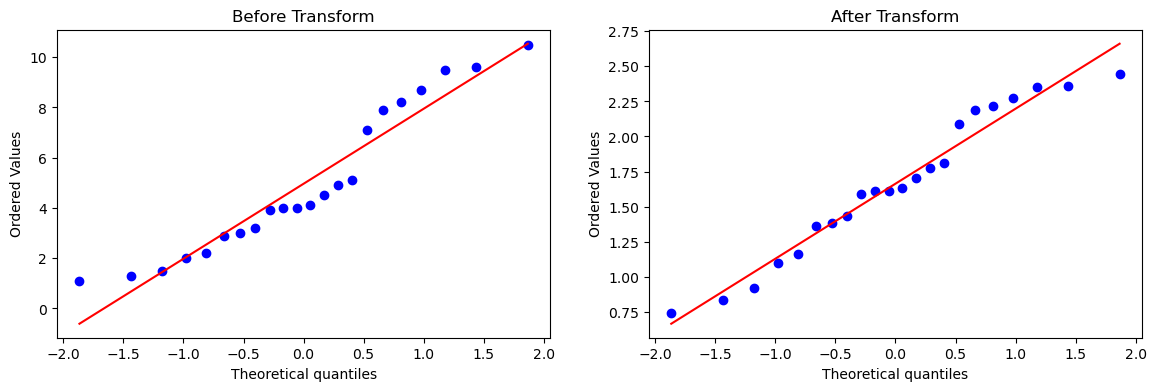

In [61]:
logtr = FunctionTransformer(np.log1p)

x_train_st = logtr.fit_transform(x_train_salary)
x_test_st = logtr.fit_transform(x_test_salary)

model.fit(x_train_st, y_train_salary)

y_pred_log = model.predict(x_test_st)

print(y_pred_log)
print("r2 score for Log Transform is: ", r2_score(y_test_salary, y_pred_log))

plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train_salary['YearsExperience'], dist='norm', plot=plt)
plt.title('Before Transform')

plt.subplot(122)
stats.probplot(x_train_st['YearsExperience'], dist='norm', plot=plt)
plt.title('After Transform')

plt.show()

### Square Transform

[[ 67904.56774346]
 [ 53395.39937996]
 [131305.97571844]
 [ 56199.69242501]
 [ 73366.84289208]
 [ 74334.12078298]
 [110911.85615315]
 [ 82657.5876761 ]]
r2 score for Square Transform is:  0.6810616256889922


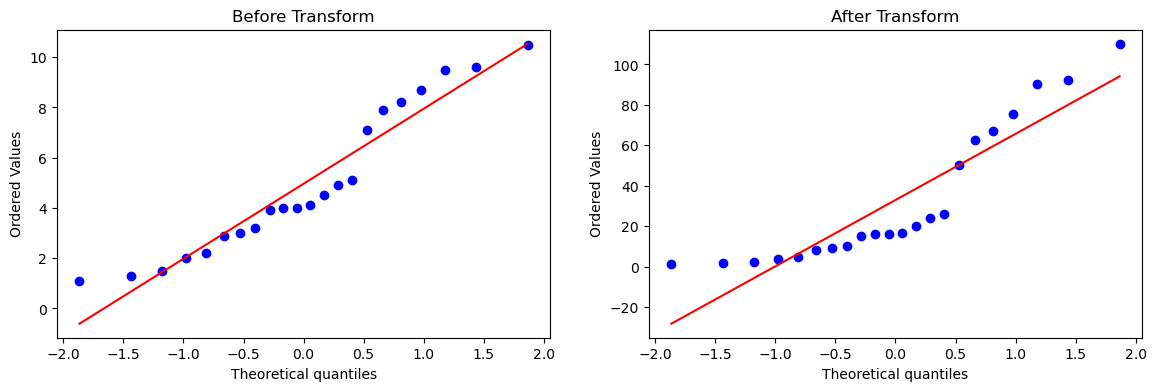

In [62]:
sqr = FunctionTransformer(lambda feature_salary: feature_salary**2)

x_train_st = sqr.fit_transform(x_train_salary)
x_test_st = sqr.fit_transform(x_test_salary)

model.fit(x_train_st, y_train_salary)

y_pred_log = model.predict(x_test_st)

print(y_pred_log)
print("r2 score for Square Transform is: ", r2_score(y_test_salary, y_pred_log))


plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train_salary['YearsExperience'], dist='norm', plot=plt)
plt.title('Before Transform')

plt.subplot(122)
stats.probplot(x_train_st['YearsExperience'], dist='norm', plot=plt)
plt.title('After Transform')

plt.show()

### Cube Transform

[[ 63488.20394659]
 [ 54577.87182701]
 [135920.2890654 ]
 [ 55950.38636041]
 [ 67824.2294521 ]
 [ 68639.29665139]
 [108007.4798012 ]
 [ 76193.0763859 ]]
r2 score for Cube Transform is:  0.44167901053008285


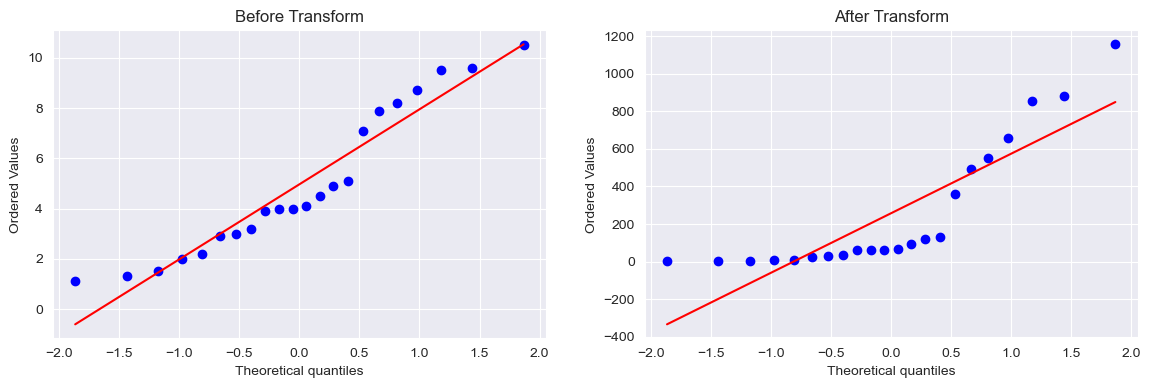

In [126]:
cube = FunctionTransformer(lambda feature_salary: feature_salary**3)

x_train_st = cube.fit_transform(x_train_salary)
x_test_st = cube.fit_transform(x_test_salary)

model.fit(x_train_st, y_train_salary)

y_pred_log = model.predict(x_test_st)

print(y_pred_log)
print("r2 score for Cube Transform is: ", r2_score(y_test_salary, y_pred_log))


plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train_salary['YearsExperience'], dist='norm', plot=plt)
plt.title('Before Transform')

plt.subplot(122)
stats.probplot(x_train_st['YearsExperience'], dist='norm', plot=plt)
plt.title('After Transform')

plt.show()

### Square-root Transform

[[ 78940.46402327]
 [ 57880.03422885]
 [116160.58733475]
 [ 63405.8498964 ]
 [ 84143.58011776]
 [ 84984.57947631]
 [107570.91236383]
 [ 91474.84826259]]
r2 score for Square-root Transform is:  0.9261617861869695


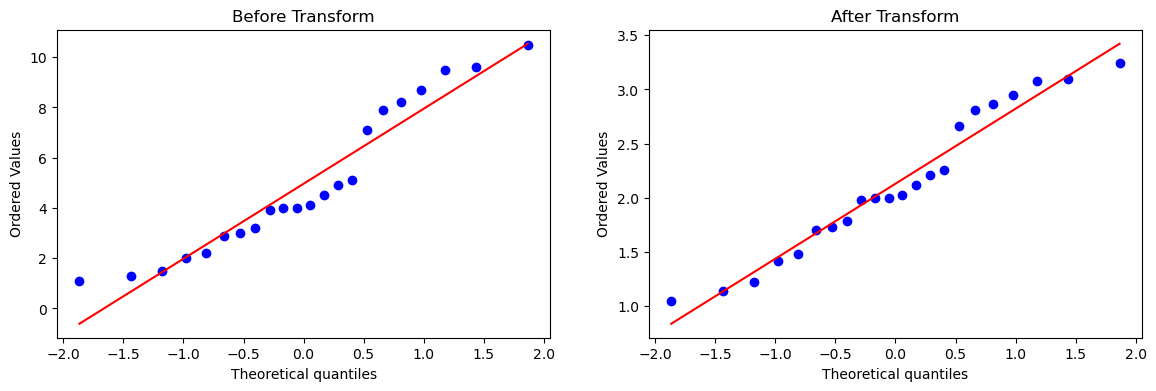

In [63]:
sqrt = FunctionTransformer(lambda feature_salary: feature_salary**0.5)

x_train_st = sqrt.fit_transform(x_train_salary)
x_test_st = sqrt.fit_transform(x_test_salary)

model.fit(x_train_st, y_train_salary)

y_pred_log = model.predict(x_test_st)

print(y_pred_log)
print("r2 score for Square-root Transform is: ", r2_score(y_test_salary, y_pred_log))


plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train_salary['YearsExperience'], dist='norm', plot=plt)
plt.title('Before Transform')

plt.subplot(122)
stats.probplot(x_train_st['YearsExperience'], dist='norm', plot=plt)
plt.title('After Transform')

plt.show()

### Cube Transform

[[ 80094.17739032]
 [ 59192.35944787]
 [113569.02572811]
 [ 64850.91735498]
 [ 85008.33337605]
 [ 85794.50916806]
 [106159.06357759]
 [ 91789.79577318]]
r2 score for Cube-root Transform is:  0.9186616595235235


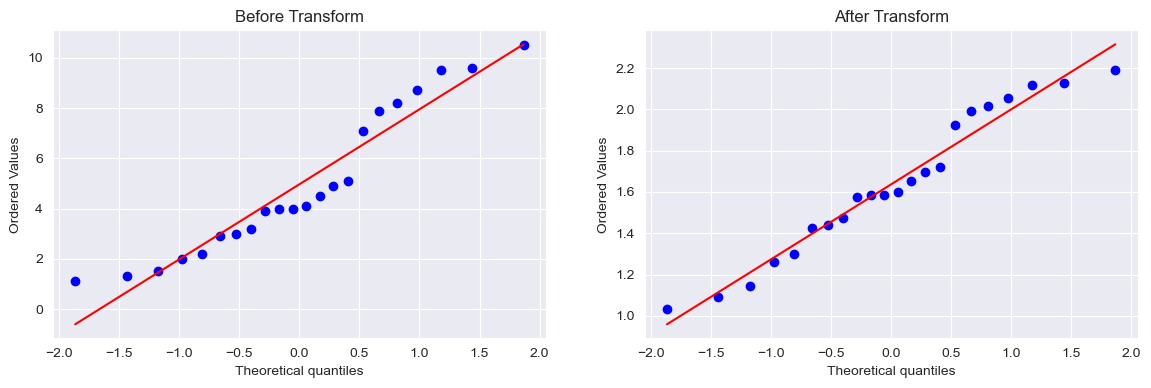

In [123]:
cbrt = FunctionTransformer(lambda feature_salary: feature_salary**(1/3))

x_train_st = cbrt.fit_transform(x_train_salary)
x_test_st = cbrt.fit_transform(x_test_salary)

model.fit(x_train_st, y_train_salary)

y_pred_log = model.predict(x_test_st)

print(y_pred_log)
print("r2 score for Cube-root Transform is: ", r2_score(y_test_salary, y_pred_log))


plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train_salary['YearsExperience'], dist='norm', plot=plt)
plt.title('Before Transform')

plt.subplot(122)
stats.probplot(x_train_st['YearsExperience'], dist='norm', plot=plt)
plt.title('After Transform')

plt.show()

### Reciprocal Transform

[[83043.95154427]
 [71166.64006448]
 [91829.75753949]
 [75217.46058204]
 [84884.50344428]
 [85155.47358512]
 [90484.55302155]
 [87036.32515092]]
r2 score for Reciprocal Transform is:  0.47164659808659937


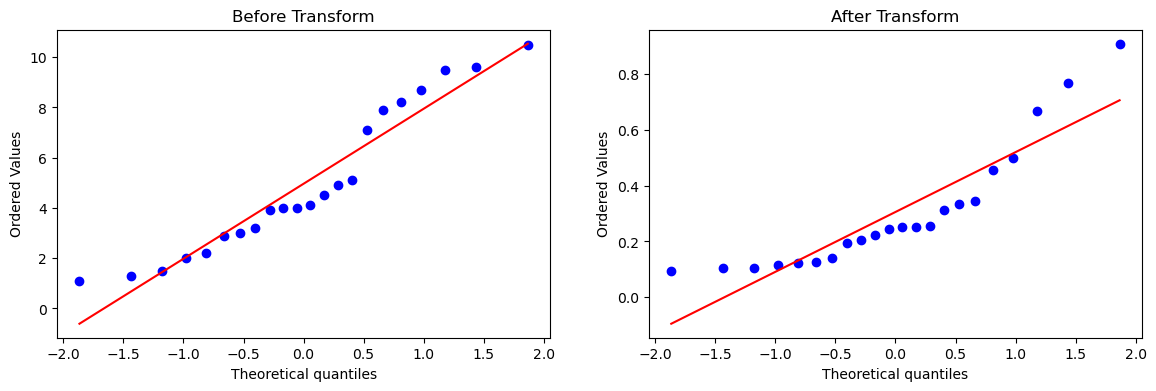

In [64]:
reci = FunctionTransformer(lambda feature_salary: 1/(feature_salary))

x_train_st = reci.fit_transform(x_train_salary)
x_test_st = reci.fit_transform(x_test_salary)

model.fit(x_train_st, y_train_salary)

y_pred_log = model.predict(x_test_st)

print(y_pred_log)
print("r2 score for Reciprocal Transform is: ", r2_score(y_test_salary, y_pred_log))


plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train_salary['YearsExperience'], dist='norm', plot=plt)
plt.title('Before Transform')

plt.subplot(122)
stats.probplot(x_train_st['YearsExperience'], dist='norm', plot=plt)
plt.title('After Transform')

plt.show()

### So, sqaure-root transformed model is the best model so far with r2 score 0.92